
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.  The analysis will be applited to this dataset according to importancy of the data. The main data analysis proccesses that will be used are Data cleaning, Data wrangling and investigating data and giving some conclusion at the end.


### Questions:
    
    1. What are th Top 10 most high budget movies
    2. What keywords word is the most popular?
    3. What genres with the highest release?
    4. What are the most voted movies?
    5. Relationship between popularity vs budget ? poularity vs revenue?
    6. What is a Budget and revenue change per year?
    7. How the number of released movies are changed per-year?
    

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Data/tmdb-movies.csv')

# check general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
# shape of the data 
df.shape

In [ ]:
# let's see first five rows of the data
df.head(5)

In [ ]:
# check lat rows of the data
df.tail(2)

In [ ]:
# Summary statistics for columns
df.describe()

In [ ]:
# The number of unique values for each column 
df.nunique()

In [ ]:
df[['keywords','original_title']].head(4)

## Data cleaning


#### 1. Check for Nan values in the data

In [ ]:
# summing up all nan values in the data by using isnull() command and sum()
df.isnull().sum()

> As we can see from the output. Most columns wit Nan values are 'homepage', 'tagline', 'keywords' and
'production companies'. Since the columns are mostly related each othe it is hard to get rid of all nan values
for the whole data, instead we did removed Nan values accordingly. 

#### 2. Check for duplicates

In [ ]:
# check for duplicate values in the columns of data
df.duplicated().sum()

> It can be clear that the there is only one duplicated data.

In [ ]:
# remove duplicates from the data
df.drop_duplicates(inplace=True)

#### 3.Change the datformat for 'release_date' column to datatime format

In [ ]:
# the datformate for release_date columns is in the string format
# it will be changed to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(3)

<a id='eda'></a>
## Exploratory Data Analysis



### Research question: 1. Top 10 most high budget movies

In [ ]:
#Top 10 movies by its budget

#to discover this we need movie title and budget columns from the database
top10_movies = df[['budget','original_title']]

#budget values are sorted in ascending order and top 10 movies are selected 
top10 = top10_movies.sort_values('budget', ascending = False)[0:10]
# set the figure size
plt.figure(figsize=(8,6))
#plot as a bar chart
plt.bar(top10['original_title'], top10['budget']);
# setting x and y labels of the chart
plt.ylabel('Budget ($)')
plt.xlabel('Movies')
# rotate the movie names for better to avoid mix of names on the chart
plt.xticks(rotation=90)
plt.title('Top 10 expensive movies by budget')


plt.show()

> Overall the plot shows that the average budget for all movies is avove than 2.5 billion dollar. The highest budet movies was "The Warrior's Way.

### Research Question 2:  What keyword word is the most popular?

In [3]:
# extract the keyword column from the data 
kword = df['keywords']
kword.head(5)

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

>As we can see keywords row include many different words with separated with "|" 
Since our plan is to count each word frequency in search we need to count them one bye one. Thus I created simple function below for counting occurrences for each word 


In [4]:
a = []
for i in range(len(kword)):
    lis = str(kword[i]).split('|')
    print(lis)
    for j in range(len(lis)):
        a.append(lis[j])
print(a)      

['monster', 'dna', 'tyrannosaurus rex', 'velociraptor', 'island']
['future', 'chase', 'post-apocalyptic', 'dystopia', 'australia']
['based on novel', 'revolution', 'dystopia', 'sequel', 'dystopic future']
['android', 'spaceship', 'jedi', 'space opera', '3d']
['car race', 'speed', 'revenge', 'suspense', 'car']
['father-son relationship', 'rape', 'based on novel', 'mountains', 'winter']
['saving the world', 'artificial intelligence', 'cyborg', 'killer robot', 'future']
['based on novel', 'mars', 'nasa', 'isolation', 'botanist']
['assistant', 'aftercreditsstinger', 'duringcreditsstinger', 'evil mastermind', 'minions']
['dream', 'cartoon', 'imaginary friend', 'animation', 'kid']
['spy', 'based on novel', 'secret agent', 'sequel', 'james bond']
['jupiter', 'space', 'woman director', '3d', 'interspecies romance']
['dancing', 'artificial intelligence', 'helicopter', 'distrust', 'isolation']
['video game', 'nerd', 'alien attack', '3d', 'pixels']
['marvel comic', 'comic', 'sequel', 'superhero',

['judge', 'self-destruction', 'wife', 'love', 'love affair']
['button', 'war context']
['death of a child', 'grief', 'pagan']
['woman director']
['nan']
['love of animals', 'wild animal']
['wheelchair', 'rescue', 'therapy', 'woman director']
['daily life', 'non fiction', 'clip show', 'fear', 'talking to the camera']
['nan']
['nan']
['cia', 'mutant', 'mine', 'marvel comic', 'based on comic book']
['telepathy']
['prostitute', 'swimming pool', 'independent film', 'teen movie']
['nan']
['germany', 'gay', 'world war ii', 'post world war ii', 'tv movie']
['cold', 'independent film', 'salesman', 'woman director']
['male nudity', 'horror', 'anthology', 'gay interest', 'drive-in theatre']
['nan']
['seefahrt', 'nordmeer', 'survival']
['road trip', 'woman director', 'christmas']
['one word title', 'killer']
['based on novel', 'obsession', 'hero', 'harpoon', 'revenge']
['nan']
['japan', 'restaurant', 'sushi restaurant', 'apprentice', 'sushi']
['nan']
['nan']
['nan']
['stand-up']
['materialism', 'l

['date', 'flirt', 'dance', 'honeymoon', 'dream girl']
['sea', 'world cup', 'surfer', 'wave', 'surfboard']
['suicide', 'new york', 'hotel', 'fire', 'hotel room']
['assassin', 'secret identity', 'intelligence', 'union of soviet socialist republics', 'russia']
['american football', 'bachelor', 'sports team', 'sport', 'aerobics']
['politically incorrect', 'motorcycle gang', 'biker film', 'awkwardness', 'gay joke']
['exploitation', 'slasher', 'zombies', 'killer']
['father-son relationship', 'new love', 'fiancÃ©', 'training', 'rent']
['kitchen', 'north dakota', 'little boy', 'rural setting', 'moving']
['destroy', 'transformation', 'alien', 'based on toy', 'transformers']
['africa', 'brain tumor', 'wife husband relationship', 'casual meeting', 'pyramid']
['prague', 'bratislava', 'castration', "ladies' man", 'student']
['paris', 'venice', 'taxi', 'italo-american', 'photographer']
['competition', 'olympic games', 'sport', 'rival', 'ice skating']
['hitchhiker', 'series of murders', 'road movie']

In [5]:
# count each occurences of keywords
def occur_count(kword):
    a = []
    for i in range(len(kword)):
        
        lis = str(kword[i]).split('|')
        for j in range(len(lis)):
            a.append(lis[j])
    return a 

In [6]:
# the function for the calculation of occurences for each keywords
def top_occurs(l):
    keywords, occurrences = np.unique(l, return_counts = True)

    # save to dataframe for conveneince use 
    data  = {'occurrences': occurrences, 'names': keywords}
    df_keywords = pd.DataFrame(data)

    top10_occurrences = df_keywords.sort_values('occurrences', ascending = False)
    return top10_occurrences

In [10]:
k = top_occurs(a)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

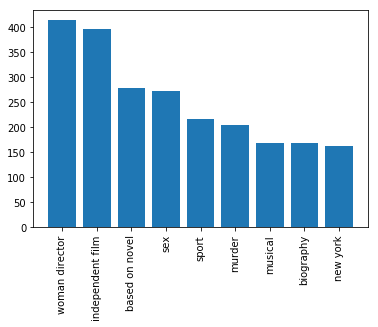

In [9]:
# count each occurences of keywords
occurs = occur_count(kword)
# top10 keywords 
top10_kwords = top_occurs(occurs)[1:10]

plt.bar(top10_kwords['names'], top10_kwords['occurrences']);
plt.xticks(rotation=90)



### Research Question 3:  What genres with the highest release?

> Similarly to question 2 we can easily calculate popular genres by its occurences

In [ ]:
#take genres from the data 
genres = df['genres']

#count occurences of each genres
genres_occurs = occur_count(genres)

#top10_genres
top10_genres = top_occurs(genres_occurs)[0:10]

plt.figure(figsize=(8,6))

plt.barh(top10_genres['names'], top10_genres['occurrences']);
plt.title('Genres with the highest release')
plt.ylabel('Genres')
#plt.colorbar()
plt.xlabel('Number of Movies')
#plt.xticks(rotation=90);

### Research Question 4: What are the most voted movies?

In [ ]:
votes = df[['original_title', 'vote_count']]
top10_votes = votes.sort_values('vote_count', ascending = False)[1:10]

plt.figure(figsize = (8, 6))
plt.title('Most voted movies')
plt.barh(top10_votes['original_title'], top10_votes['vote_count'])
plt.show()


### Research Question 5: Relationship between popularity vs budget ? poularity vs revenue?

#### 5.1 Popularity vs Budget

In [ ]:
# extract budget and popularity 
pop_budget = df[['budget', 'popularity']]

# calculation of the correlation between budget and populariyt
pop_budget_corr = pop_budget.corr(method = 'pearson')
corr = pop_budget_corr.loc['budget', 'popularity']

print('The correlation between popularity and budget is {}'.format(corr))


# plotting  
ax = sns.regplot(x=pop_budget['popularity'], y=pop_budget['budget'],color='c')
#set the title and labels of the figure
ax.set_title("Popularity Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#### 5.3 Popularity vs Revenue

#### 5.3 Popularity vs Revenue

In [ ]:
#how does profit change according to their budget.
#make a scatter plot using 'regplot' between 'popularity' and 'revenue'.
ax = sns.regplot(x=df['popularity'], y=df['revenue'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Popularity Vs Revenue",fontsize=13)
#ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)
ax.set_xlabel("Popularity", fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data_corr = df.corr()
#print the correction between them,which was stored in 'data_corr'.
print("Correlation Between Popularity And Revenue : ",data_corr.loc['popularity','revenue'])

In [ ]:
#how does popularity change according to their budget.
#make a scatter plot using 'regplot' between 'popularity' and 'budget'.
ax = sns.regplot(x=df['budget'], y=df['revenue'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Budget Vs Revenue",fontsize=13)
ax.set_ylabel("Revenue",fontsize=12)
ax.set_xlabel("Budget", fontsize=12)
#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data_corr = df.corr()
#print the correction between them,which was stored in 'data_corr'.
print("Correlation Between Budget And Revenue : ",data_corr.loc['budget','revenue'])

### Research Question 6: What is a Budget and revenue change per year?

#### 1. Budget change per year

In [ ]:
# calculate the budget 
budget_year = df.groupby('release_year')['budget'].mean()

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))

plt.title('Budget change per-year')
plt.ylabel('Budget')
plt.xlabel('Years')
plt.plot(budget_year);

sns.set_style("whitegrid")


#### 2. Revenue change per year

In [ ]:
budget_year = df.groupby('release_year')['revenue'].mean()

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))
plt.title('Revenue change per year')
plt.ylabel('Revenue ($)')
plt.xlabel('Years')

plt.plot(budget_year);

> It is clear that the revenue is increased per-year with little fluctutation. It is needed to be mentioned
that the revenue for 2000 was the highest with the hihger than five billion dollar, in ocompared to 2015 which was around four billion

### Research Question 7: How the number of released movies are changed per-year?

In [ ]:
data = df.groupby('release_year').count()['id']

sns.set(rc={'figure.figsize':(10,5)})

plt.xticks(np.arange(1960, 2016, 5))

plt.ylabel('Revenue ($)')
plt.xlabel('Years')

plt.plot(data);

>From the graph it is obvious that number of released movies per year are increased rapidly after 20th, while it was performing slow pace increase fomr 1960 to 2000.

<a id='conclusions'></a>
## Conclusions

> 
- Most searched keyword was "Woman director.
- Drame, Comedy, Thriller and Action are four most-made genres. 
- Top 3 most voted movies: "The Avengers", "Avatar" and "The Dark Knight"
- There is positive corellation between Popularity and Budget almost 0.66%
- The relationship between Budget and Revenue is very strong.
- The budget for movies are decreased after 20'th
- The revenue from movies are start to decrease after 20th with fluctuations each year
- The number of released movies per-year is performed dramatic increase between 2005 and 2015
- Movies with higher budgets have shown a corresponding increase in the revenues.
